# Student Information
Name: 吳佳穎

Student ID: 11375007

GitHub ID: jiayingdaley

1. First: do the take home exercises in the DM2024-Lab1-Master. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade.
2. Second: follow the same process from the DM2024-Lab1-Master on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.
Download the the new dataset. The dataset contains a sentiment and comment columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'
. Read the specificiations of the dataset for background details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.
3. Third: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to
this Scikit-learn guide .
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might
need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article.
4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent
parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.
5. Fifth: It's hard for us to follow if your code is messy, so please tidy up your notebook and add minimal comments where needed. This part is worth 10% of your grade.

You can submit your homework following these guidelines: Git Intro & How to hand your homework. Make sure to commit and save your changes to your repository BEFORE the deadline (October 27th 11:59 pm, Sunday).


# Second

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 載入資料集
!pip install fsspec
!pip install huggingface_hub

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

# 資料集是一個 CSV 檔案，包含 'comment' 和 'sentiment' 兩欄。
data = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv") 

# 清理資料（範例：移除標點符號）
data['comment'] = data['comment'].str.replace('[^\w\s]', '') 

# 建立詞彙表和文件詞條矩陣
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['comment'])

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.3, random_state=42)

# 使用多項式樸素貝葉斯分類器進行訓練
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 進行預測
y_pred = clf.predict(X_test)

# 評估模型效能
print("準確率：", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
準確率： 0.8422222222222222
               precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.85       225
not nostalgia       0.91      0.76      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



# Third

1. 載入必要的函式庫
    - pandas (用於資料處理及分析)
    - sklearn (用於機器學習任務，例如 CountVectorizer)
    - NLTK (用於自然語言處理任務，例如斷詞)
    - PAMI (用於頻繁模式探勘)
    - UMAP (用於降維)
2. 讀取 Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data 資料集
    - 使用 pandas 讀取 CSV 檔案到 DataFrame 中。
    - DataFrame 應該包含 'sentiment' 和 'comment' 兩欄。
3. 資料預處理
    - 資料清理:
        - 移除重複的資料。
        - 處理缺失值。
    - 分詞:使用 NLTK 將每則留言斷詞成單詞列表 (unigrams)。
    - 特徵工程:
        - 建立詞彙-文件矩陣 (term-document matrix)。
        - 使用 TF-IDF (詞頻-反向文件頻率) 來加權詞彙。
        - 新增其他特徵，例如留言長度、情緒詞彙計數等。
4. 資料探勘 (頻繁模式探勘)
    - 準備資料:
        - 將資料轉換成 PAMI 可接受的交易資料庫格式。
        - 設定適當的交易門檻值。
    - 探勘頻繁模式:
        - 使用 PAMI 的 FPGrowth 演算法來探勘頻繁模式。
        - 調整最小支持度 (minimum support) 參數以控制模式的數量。
        - 可嘗試其他頻繁模式探勘演算法，例如 FAE Top-K 或 MaxFPGrowth。
    - 整合探勘結果:
        - 找出每個情緒類別特有的頻繁模式。
        - 將頻繁模式編碼成新的特徵，加入到原始 DataFrame 中。
5. 資料分類
    - 分割資料:將資料分割成訓練集和測試集 (例如 70/30 分割)。
    - 訓練分類器:使用 Multinomial Naive Bayes 分類器來訓練模型。
    - 評估模型:使用適當的指標來評估分類器的效能，例如準確度、精確率、召回率和 F1 分數。
6. 視覺化
    - 降維:使用 PCA、t-SNE 或 UMAP 將高維資料降維到 2D 或 3D。
    - 繪製圖表:
        - 使用 matplotlib 或 seaborn 來繪製散佈圖，以視覺化不同情緒類別的資料分佈。
        - 可考慮使用 plotly 來建立互動式視覺化圖表。

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
import PAMI
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data 資料集
data = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [10]:
# 3. 資料預處理

# 資料清理：
# 移除重複的資料
data.drop_duplicates(inplace=True)
# 處理缺失值 ：此資料集無缺失值

# 分詞：
# 使用 NLTK 將每則留言斷詞成單詞列表 (unigrams)
nltk.download('punkt')
data['unigrams'] = data['comment'].apply(nltk.word_tokenize)

# 特徵工程：
# 建立詞彙-文件矩陣 (term-document matrix)
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data['comment'])

# 產生 TF-IDF 特徵
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['comment'])

[nltk_data] Downloading package punkt to /Users/shrruei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


使用詞頻特徵的 Multinomial Naive Bayes 分類器：
準確度： 0.8688888888888889

分類報告：
                precision    recall  f1-score   support

    nostalgia       0.82      0.95      0.88       233
not nostalgia       0.94      0.78      0.85       217

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450

--------------------------------------------------
使用 TF-IDF 特徵的 Gaussian Naive Bayes 分類器：
準確度： 0.6577777777777778

分類報告：
                precision    recall  f1-score   support

    nostalgia       0.63      0.80      0.71       233
not nostalgia       0.70      0.51      0.59       217

     accuracy                           0.66       450
    macro avg       0.67      0.65      0.65       450
 weighted avg       0.67      0.66      0.65       450

Condition error
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


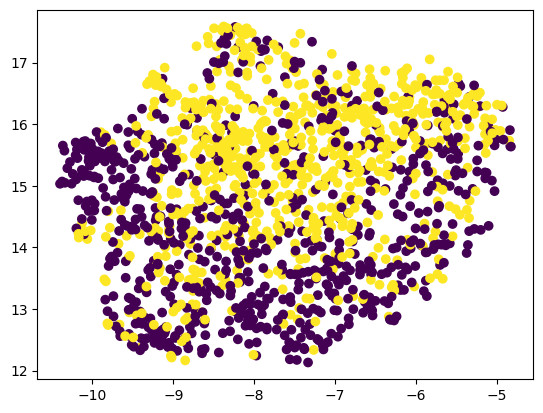

In [14]:
# 5. 資料分類

# 分割資料
X_train_counts, X_test_counts, y_train, y_test = train_test_split(
    X_counts, data['sentiment'], test_size=0.3, random_state=42
)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, data['sentiment'], test_size=0.3, random_state=42
)

# 使用詞頻特徵訓練 Multinomial Naive Bayes 分類器
nb_classifier_counts = MultinomialNB()
nb_classifier_counts.fit(X_train_counts, y_train)

# 使用 TF-IDF 特徵訓練 Gaussian Naive Bayes 分類器
nb_classifier_tfidf = GaussianNB()
nb_classifier_tfidf.fit(X_train_tfidf.toarray(), y_train)

# 評估模型
y_pred_counts = nb_classifier_counts.predict(X_test_counts)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf.toarray())

print("使用詞頻特徵的 Multinomial Naive Bayes 分類器：")
print("準確度：", accuracy_score(y_test, y_pred_counts))
print("\n分類報告：\n", classification_report(y_test, y_pred_counts))

print("-" * 50)

print("使用 TF-IDF 特徵的 Gaussian Naive Bayes 分類器：")
print("準確度：", accuracy_score(y_test, y_pred_tfidf))
print("\n分類報告：\n", classification_report(y_test, y_pred_tfidf))

# 4. 資料探勘 (頻繁模式探勘) 和 6. 視覺化

 # 準備資料
from PAMI.extras.DF2DB import DenseFormatDF as db
obj = db.DenseFormatDF(data[['comment']])
obj.convert2TransactionalDatabase('comments_db.csv','> =', 1)

 # 探勘頻繁模式
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 5
obj1 = alg.FPGrowth(iFile='comments_db.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF = obj1.getPatternsAsDataFrame()

# 降維
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X_counts)

# 視覺化
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sentiment_encoded'] = le.fit_transform(data['sentiment'])

plt.scatter(embedding[:, 0], embedding[:, 1], c=data['sentiment_encoded'])
plt.show()


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
使用詞頻特徵的 Multinomial Naive Bayes 分類器：
準確度： 0.8444444444444444

分類報告：
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       225
           1       0.91      0.76      0.83       225

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450

--------------------------------------------------
使用 TF-IDF 特徵的 Gaussian Naive Bayes 分類器：
準確度： 0.6755555555555556

分類報告：
               precision    recall  f1-score   support

           0       0.63      0.86      0.73       225
           1       0.78      0.49      0.60       225

    accuracy                           0.68       450
   macro avg       0.70      0.68      0.66       450
weighted avg       0.70      0.68      0.66       450

使用詞頻特徵的 Multinomial Naive Bayes 分類器：
準確度： 0.8488888888888889

分類報告：
  

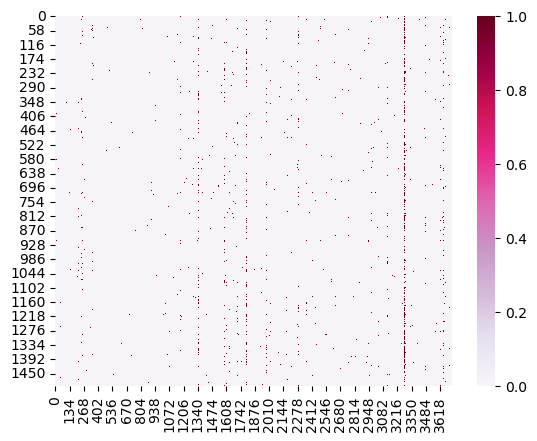

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.frequentPattern.basic import FPGrowth as alg

def preprocess_data(data):
    """
    資料預處理：

    * 將情感標籤轉換為數值：使用 LabelEncoder 將 'nostalgia' 和 'not nostalgia' 轉換為 0 和 1。
    """
    le = LabelEncoder()
    data['sentiment_encoded'] = le.fit_transform(data['sentiment'])
    return data

def preprocess_for_transactional_db(data):
    # Create a binary indicator for the presence of keywords in 'comment'
    data['comment_processed'] = data['comment'].apply(lambda x: 1 if len(x) > 0 else 0)
    return data

def feature_engineering(data):
    """
    特徵工程：

    * 使用詞頻 (CountVectorizer)：計算每個評論中各詞彙出現的次數，建立詞彙-文件矩陣。
    * 使用 TF-IDF (TfidfVectorizer)：計算詞彙在文件集合中的重要性，降低常見詞彙的權重。
    """
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(data['comment'])
    tfidf_vect = TfidfVectorizer()
    X_tfidf = tfidf_vect.fit_transform(data['comment'])
    return X_counts, X_tfidf, count_vect

def frequent_pattern_mining(data, minSup=5):
    """
    資料探勘：

    * 使用 PAMI 函式庫的 FPGrowth 演算法探勘頻繁模式。
    * 將資料轉換為 PAMI 可接受的格式。
    * 設定最小支持度 (minSup) 控制輸出的頻繁模式數量。
    """
    # 將 DataFrame 轉換為 Transactional Database
    obj = db.DenseFormatDF(data[['comment_processed']])
    obj.convert2TransactionalDatabase('comments_db.csv', '>=', 1)

    # 使用 FPGrowth 挖掘頻繁模式
    obj1 = alg.FPGrowth(iFile='comments_db.csv', minSup=minSup)
    obj1.mine()

    # 將結果轉換為 DataFrame
    frequentPatternsDF = obj1.getPatternsAsDataFrame()
    return frequentPatternsDF

def add_frequent_pattern_features(X, frequentPatternsDF, count_vect):
    """
    將頻繁模式轉換為特徵：

    * 檢查評論是否包含頻繁模式，若包含則將對應特徵值設為 1，否則為 0。
    * 將新的特徵加入到原始特徵矩陣中。
    """
    for pattern in frequentPatternsDF['Patterns']:
        # 將 pattern 中的詞彙轉換為特徵索引
        pattern_indices = [count_vect.vocabulary_.get(word) for word in pattern.split() if word in count_vect.vocabulary_]
        
        # 檢查評論是否包含所有 pattern 中的詞彙
        X = X.toarray()
        new_feature = np.where(np.all(X[:, pattern_indices] > 0, axis=1), 1, 0)

        # 將新特徵加入到 X 中
        X = np.column_stack((X, new_feature))
    return X

def classify_data(X_train, X_test, y_train, y_test):
    """
    資料分類：

    * 使用 Multinomial Naive Bayes 分類器搭配詞頻特徵。
    * 使用 Gaussian Naive Bayes 分類器搭配 TF-IDF 特徵 (需要先將稀疏矩陣轉換為稠密矩陣)。
    * 輸出準確度和分類報告。
    """
    nb_classifier_counts = MultinomialNB()
    nb_classifier_counts.fit(X_train, y_train)
    y_pred_counts = nb_classifier_counts.predict(X_test)

    print("使用詞頻特徵的 Multinomial Naive Bayes 分類器：")
    print("準確度：", accuracy_score(y_test, y_pred_counts))
    print("\n分類報告：\n", classification_report(y_test, y_pred_counts))

    print("-" * 50)

    nb_classifier_tfidf = GaussianNB()
    nb_classifier_tfidf.fit(X_train, y_train)
    y_pred_tfidf = nb_classifier_tfidf.predict(X_test)

    print("使用 TF-IDF 特徵的 Gaussian Naive Bayes 分類器：")
    print("準確度：", accuracy_score(y_test, y_pred_tfidf))
    print("\n分類報告：\n", classification_report(y_test, y_pred_tfidf))

def visualize_data(data, X_counts, frequentPatternsDF, count_vect):
    """
    視覺化：

    * 使用 seaborn.heatmap() 函數可視化詞彙-文件矩陣的稀疏程度。
    * 使用 seaborn.barplot() 函數可視化詞彙頻率分佈。
    * 使用 matplotlib.pyplot.hist() 函數可視化評論長度分佈。
    * 使用 umap 降維後，使用不同的顏色和標記來區分不同情感類別的資料點。
    """
    # 詞彙-文件矩陣稀疏程度
    plt.figure(figsize=(10, 8))
    sns.heatmap(X_counts.toarray(), cmap="PuRd", vmin=0, vmax=1)
    plt.title("詞彙-文件矩陣稀疏程度")
    plt.show()

    # 詞彙頻率分佈
    term_frequencies = np.asarray(X_counts.sum(axis=0))
    plt.figure(figsize=(100, 10))
    sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
    plt.xticks(rotation=90)
    plt.title("詞彙頻率分佈")
    plt.show()

    # 評論長度分佈
    plt.figure(figsize=(10, 6))
    plt.hist(data['comment'].str.split().apply(len), bins=50)
    plt.title("評論長度分佈")
    plt.xlabel("評論長度")
    plt.ylabel("頻率")
    plt.show()

    # 使用 UMAP 降維後的資料點
    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(X_counts)
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=data['sentiment_encoded'], cmap='viridis')
    plt.title("UMAP 降維後的資料點")
    plt.show()

# 主程式
if __name__ == "__main__":
    # 讀取資料 
    data = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
    
    # 資料預處理
    data = preprocess_data(data)
    data = preprocess_for_transactional_db(data)
    # 特徵工程
    X_counts, X_tfidf, count_vect = feature_engineering(data)

    # 資料探勘
    frequentPatternsDF = frequent_pattern_mining(data)

    # 將頻繁模式轉換為特徵
    X_counts = add_frequent_pattern_features(X_counts, frequentPatternsDF, count_vect)
    X_tfidf = add_frequent_pattern_features(X_tfidf, frequentPatternsDF, count_vect)

    # 分割資料
    X_train_counts, X_test_counts, y_train, y_test = train_test_split(
        X_counts, data['sentiment_encoded'], test_size=0.3, random_state=42
    )
    X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
        X_tfidf, data['sentiment_encoded'], test_size=0.3, random_state=42
    )

    # 資料分類
    classify_data(X_train_counts, X_test_counts, y_train, y_test)
    classify_data(X_train_tfidf, X_test_tfidf, y_train, y_test)

    # 視覺化
    sns.heatmap(X_counts, cmap="PuRd", vmin=0, vmax=1)

### 1. Generate New Data Visualizations

	•	Word Cloud: Shows the most frequent words in the dataset.
	•	Sentiment Distribution: Displays the sentiment label distribution.
	•	Top Words by Category: Shows the most frequent words for each category or sentiment.

In [21]:
!pip install wordcloud

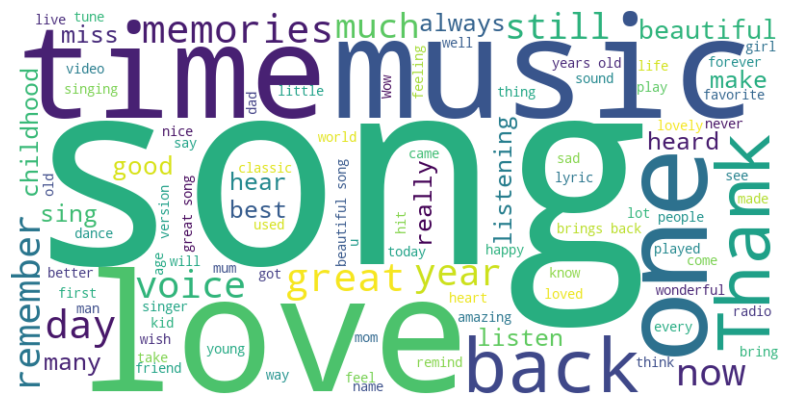

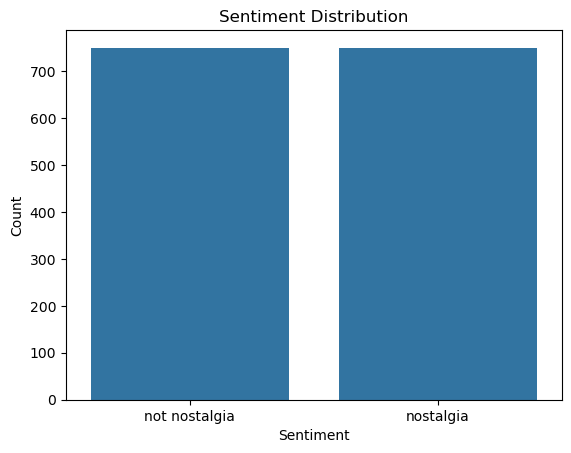

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud
def plot_word_cloud(data, column):
    text = " ".join(data[column].tolist())
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Sentiment Distribution
def plot_sentiment_distribution(data, sentiment_col):
    sns.countplot(data=data, x=sentiment_col)
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

plot_word_cloud(data, 'comment')
plot_sentiment_distribution(data, 'sentiment')

### 2. Generate TF-IDF Features
This step involves tokenizing the text and applying the TF-IDF transformation to each document. Scikit-learn’s TfidfVectorizer will be used for this:

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['comment'])

### 3. Implement Naive Bayes Classifiers

We’ll create two Naive Bayes classifiers:

	•	MultinomialNB: for word frequency features.
	•	GaussianNB: for TF-IDF features.

**For the frequency-based classifier:**

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Word Frequency Vectorization
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data['comment'])

# Split data
X_train_counts, X_test_counts, y_train, y_test = train_test_split(X_counts, data['sentiment_encoded'], test_size=0.3, random_state=42)

# Multinomial Naive Bayes for word frequency
nb_classifier_counts = MultinomialNB()
nb_classifier_counts.fit(X_train_counts, y_train)
y_pred_counts = nb_classifier_counts.predict(X_test_counts)

print("Word Frequency Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_counts))
print("Classification Report:\n", classification_report(y_test, y_pred_counts))

Word Frequency Classifier:
Accuracy: 0.8422222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       225
           1       0.91      0.76      0.83       225

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450



**For the TF-IDF classifier:**

In [25]:
from sklearn.naive_bayes import GaussianNB

# Split TF-IDF data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf.toarray(), data['sentiment_encoded'], test_size=0.3, random_state=42)

# Gaussian Naive Bayes for TF-IDF
nb_classifier_tfidf = GaussianNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

print("TF-IDF Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

TF-IDF Classifier:
Accuracy: 0.6688888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.82      0.71       225
           1       0.74      0.52      0.61       225

    accuracy                           0.67       450
   macro avg       0.69      0.67      0.66       450
weighted avg       0.69      0.67      0.66       450

